<a href="https://colab.research.google.com/github/pramanand-coder/Machine-Learning/blob/main/predictingdiabetes_using_the_different_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing some required library

In [1]:
import numpy as np
import pandas as pd

Reading the dataset

In [2]:
data=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')

Analysing the dataset

In [3]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking for the null values

In [11]:
data.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [12]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [13]:
data.corr()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Segregating the dataset into x and y**

In [22]:
y=data['diabetes']
x=data.drop(['diabetes'],axis=1)
print(x.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0            6      148         72       35        0  33.6  0.627   50
1            1       85         66       29        0  26.6  0.351   31
2            8      183         64        0        0  23.3  0.672   32
3            1       89         66       23       94  28.1  0.167   21
4            0      137         40       35      168  43.1  2.288   33


In [23]:
print(y.shape,x.shape)

(768,) (768, 8)


Spliting the dataset into train and test

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=True)

In [28]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(576, 8) (192, 8) (576,) (192,)


Fitting the Algorithm

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.metrics import accuracy_score
Accuracy=[]
Algorithms=[LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,RandomForestClassifier]
for i in Algorithms:
  model=i()
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  score=accuracy_score(y_pred,y_test)
  print("Accuray Score of {0} is {1}".format(i,score*100))
  Accuracy.append(score*100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuray Score of <class 'sklearn.linear_model._logistic.LogisticRegression'> is 77.60416666666666
Accuray Score of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 70.3125
Accuray Score of <class 'sklearn.neighbors._classification.KNeighborsClassifier'> is 74.47916666666666
Accuray Score of <class 'sklearn.svm._classes.SVC'> is 77.08333333333334
Accuray Score of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 80.20833333333334


[]

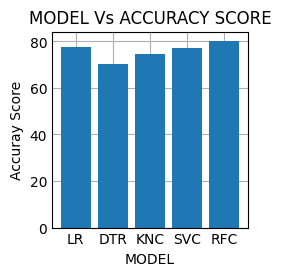

In [55]:
import matplotlib.pyplot as plt
x=["LR","DTR","KNC","SVC","RFC"]
plt.bar(x,Accuracy)
plt.title("MODEL Vs ACCURACY SCORE")
plt.xlabel("MODEL")
plt.ylabel("Accuray Score")
plt.plot()

From the above graph we can say that the RandomForestClassifier giving a best accuray score 

**So we will train our dataset using RandomForestClassifier Algorithm**


In [56]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=120)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=120)

In [62]:
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0]


In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuray_score=",accuracy_score(y_pred,y_test)*100)

Accuray_score= 80.20833333333334


In [67]:
print("Confusion Matrix")
print(confusion_matrix(y_pred,y_test))

Confusion Matrix
[[107  22]
 [ 16  47]]


In [68]:
print("Classification Report",classification_report(y_pred,y_test))

Classification Report               precision    recall  f1-score   support

           0       0.87      0.83      0.85       129
           1       0.68      0.75      0.71        63

    accuracy                           0.80       192
   macro avg       0.78      0.79      0.78       192
weighted avg       0.81      0.80      0.80       192

